Original Data Shape: (150, 4)

First 5 rows of original data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Standardized Data (first 5 rows):
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]

Covariance Matrix:
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]

Eigenvalues:
 [2.93808505 0.9201649  0.14774182 0.02085386]

Eigenvectors (each column is a principal component):
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

E

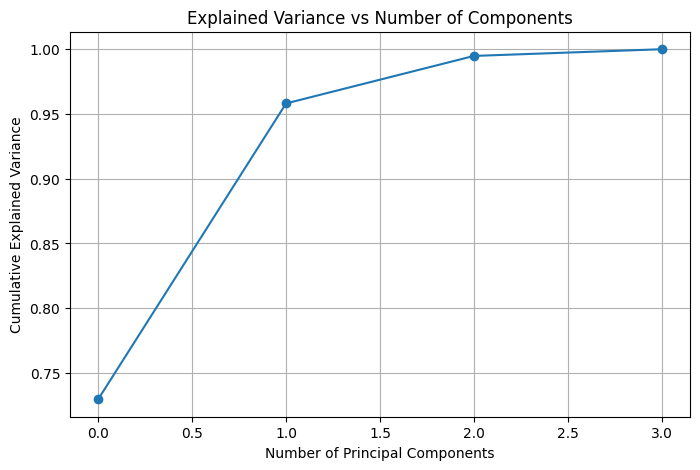

In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
feature_names = iris.feature_names

print("Original Data Shape:", X.shape)
print("\nFirst 5 rows of original data:\n", X[:5])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nStandardized Data (first 5 rows):\n", X_scaled[:5])

# Compute the covariance matrix
cov_matrix = np.cov(X_scaled.T)  # transpose so features are in rows
print("\nCovariance Matrix:\n", cov_matrix)

# Get eigenvalues and eigenvectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print("\nEigenvalues:\n", eig_vals)
print("\nEigenvectors (each column is a principal component):\n", eig_vecs)

# Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eig_vals)[::-1]
eig_vals_sorted = eig_vals[sorted_indices]
eig_vecs_sorted = eig_vecs[:, sorted_indices]

# Explained variance ratio
explained_variance_ratio = eig_vals_sorted / np.sum(eig_vals_sorted)
print("\nExplained Variance Ratio:\n", explained_variance_ratio)

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Choose number of components to explain at least 95% variance
k = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nNumber of principal components selected: {k}")

# Projection matrix
P = eig_vecs_sorted[:, :k]

# Project data onto k principal components
X_pca = X_scaled.dot(P)
print("\nProjected Data (first 5 rows):\n", X_pca[:5])

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.show()
